<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/Advertising%20Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import *
from sklearn.model_selection import train_test_split

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
df = pd.read_csv("/content/sample_data/advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


**Check the head of ad_data**

In [3]:
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df.shape

(1000, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
#Please write code here

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

In [7]:
import matplotlib.pyplot as plt

<ipython-input-8-9d684e8370c2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=False, bins=30)


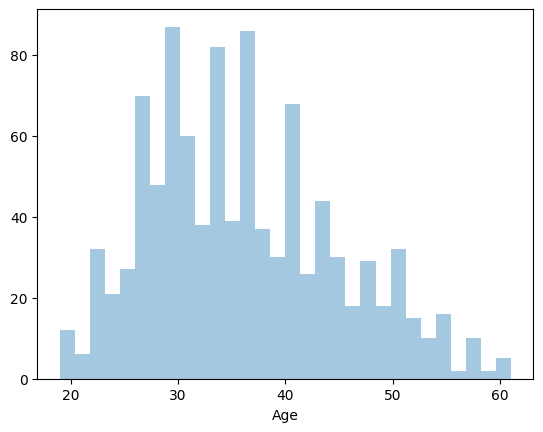

In [8]:


sns.distplot(df['Age'], kde=False, bins=30)
plt.show()


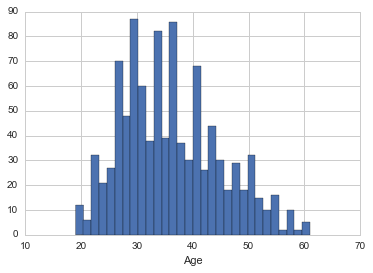

**Create a jointplot showing Area Income versus Age.**

In [ ]:
#Please write code here

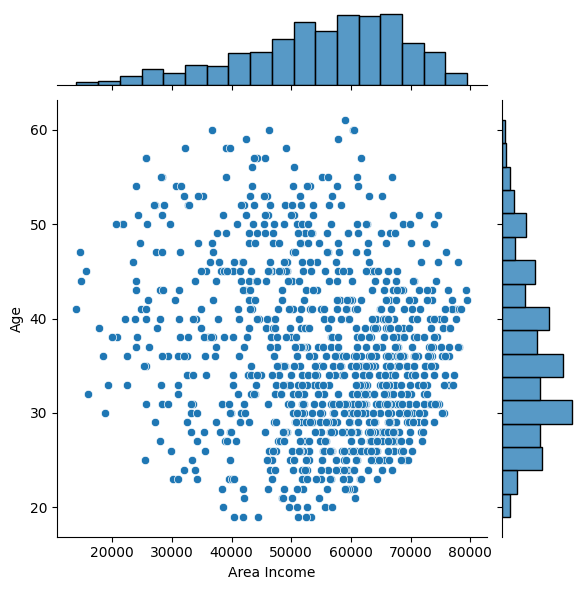

In [9]:


sns.jointplot(data=df, x="Area Income", y="Age")
plt.show()


**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

In [ ]:
#Please write code here

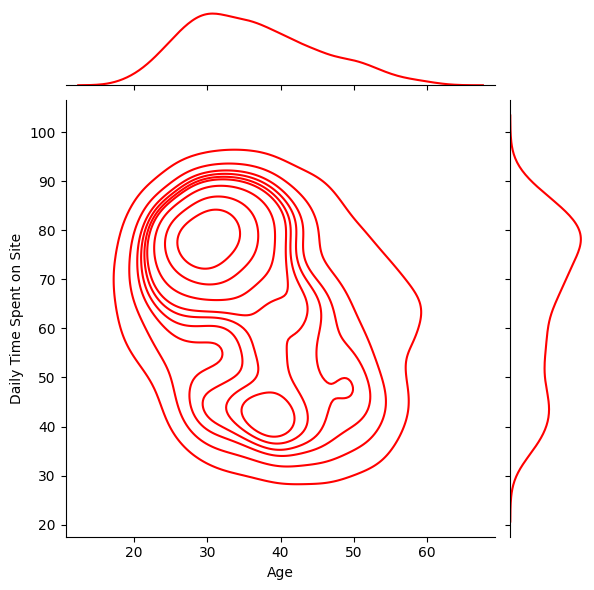

In [12]:

sns.jointplot(x="Age", y="Daily Time Spent on Site", data=df, kind="kde", color="red")
sns.set_style("dark")
plt.show()


** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

In [ ]:
#Please write code here

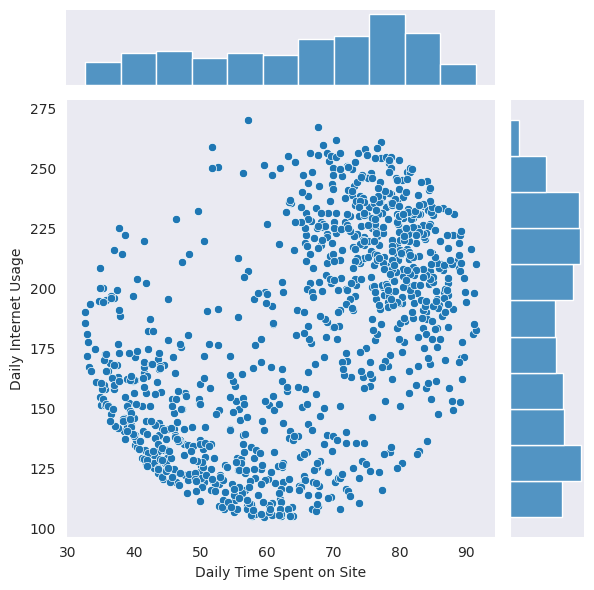

In [18]:
import seaborn as sns
sns.jointplot(data=df, x='Daily Time Spent on Site',y='Daily Internet Usage')
sns.set_style("dark")

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

In [ ]:
#Please write code here

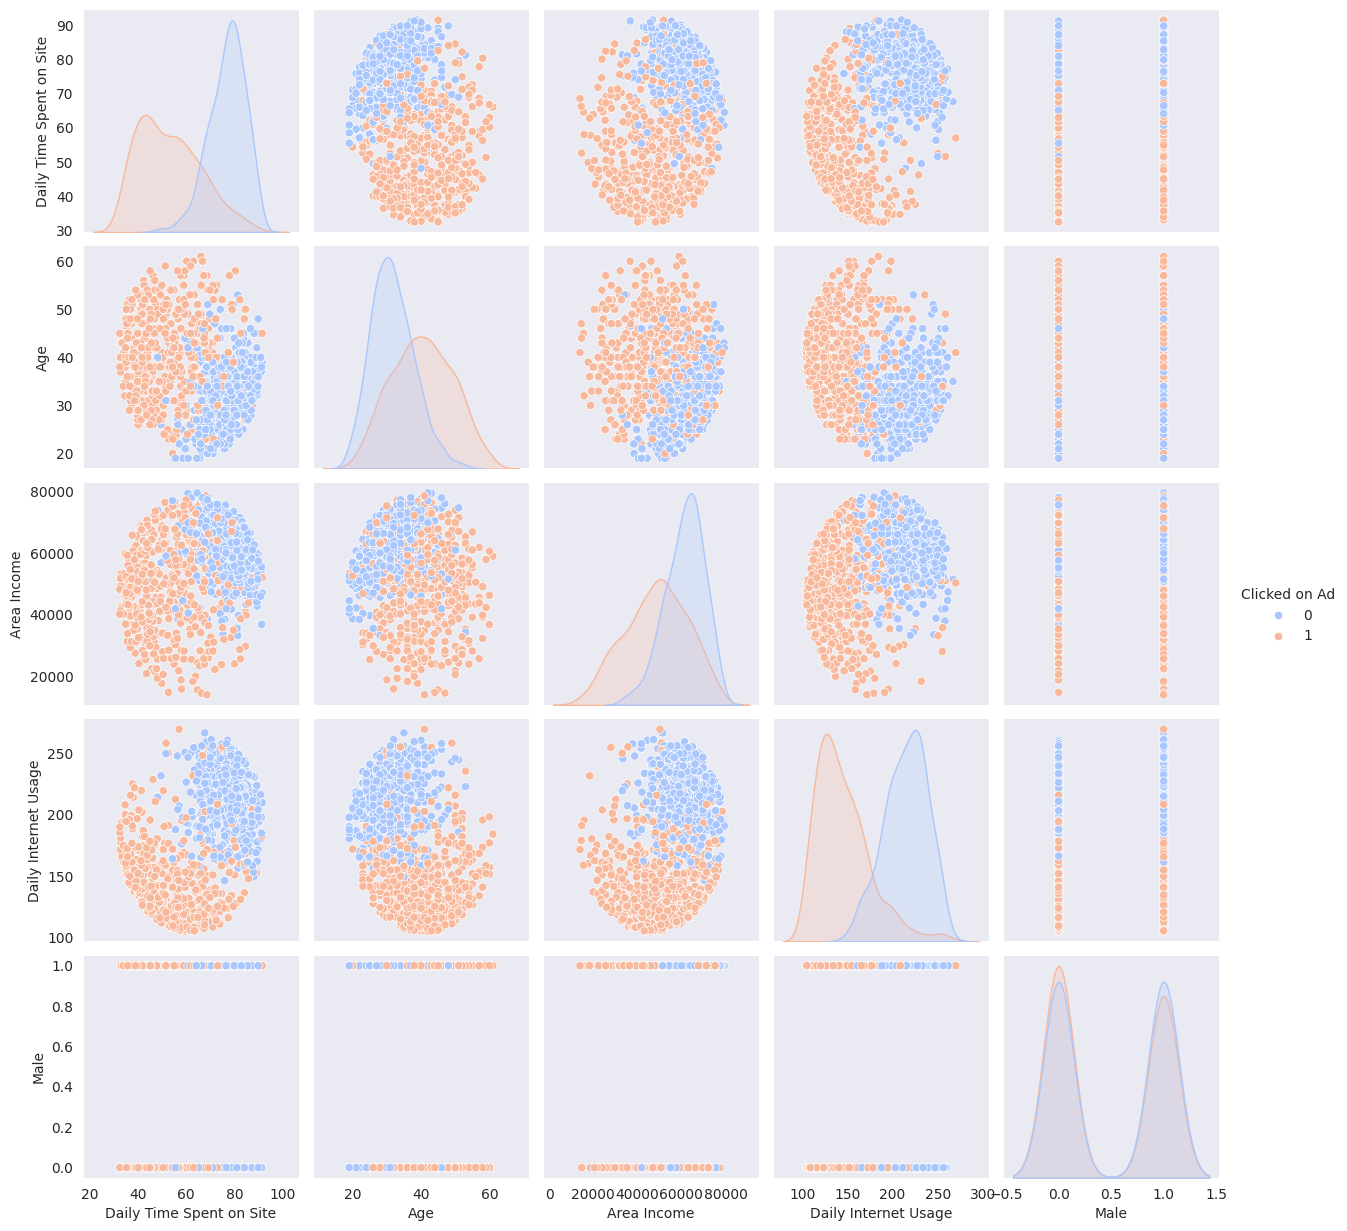

In [20]:
# prompt:  create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

sns.pairplot(df, hue="Clicked on Ad", palette="coolwarm")
plt.show()


# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [29]:


X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [30]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
290,50.52,31,72270.88,171.62,0
167,86.06,31,53767.12,219.72,1
486,83.97,40,66291.67,158.42,1
683,76.83,28,67990.84,192.81,0
876,67.39,44,51257.26,107.19,0
...,...,...,...,...,...
575,48.86,54,53188.69,134.46,0
838,44.13,40,33601.84,128.48,1
337,75.32,28,59998.50,233.60,1
523,67.94,43,68447.17,128.16,0


In [31]:
X_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
545,42.60,55,55121.65,168.29,0
298,80.39,31,66269.49,214.74,0
109,74.02,32,72272.90,210.54,0
837,55.77,49,55942.04,117.33,1
194,77.20,33,49325.48,254.05,1
...,...,...,...,...,...
847,88.82,36,58638.75,169.10,0
682,43.57,36,50971.73,125.20,1
884,70.92,39,66522.79,249.81,1
325,36.87,36,29398.61,195.91,0


In [32]:
y_train

290    1
167    0
486    0
683    0
876    1
      ..
575    1
838    1
337    0
523    1
863    0
Name: Clicked on Ad, Length: 700, dtype: int64

In [33]:
y_test

545    1
298    0
109    0
837    1
194    0
      ..
847    0
682    1
884    0
325    1
482    0
Name: Clicked on Ad, Length: 300, dtype: int64

** Train and fit a logistic regression model on the training set.**

In [34]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9266666666666666
Confusion Matrix:
[[149   8]
 [ 14 129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## Predictions and Evaluations
** Now predict values for the testing data.**

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9266666666666666


** Create a classification report for the model.**

In [37]:


from sklearn.metrics import classification_report

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [ ]:
#Please write code here

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



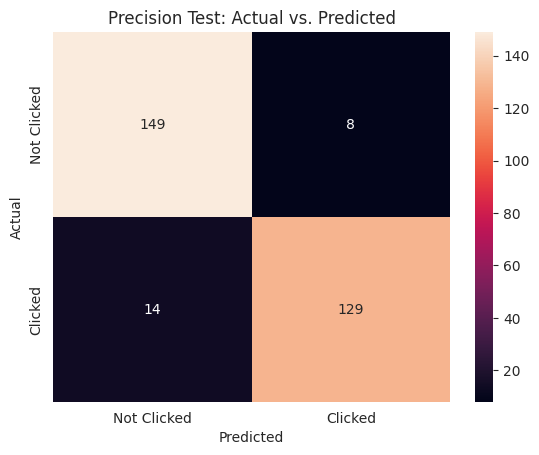

In [39]:

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels for the plot
labels = ['Not Clicked', 'Clicked']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

# Set the title and labels for the plot
plt.title('Precision Test: Actual vs. Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()


In [40]:


import plotly.express as px
import pandas as pd

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels for the plot
labels = ['Not Clicked', 'Clicked']

# Create a DataFrame from the confusion matrix
df_cm = pd.DataFrame(cm, columns=labels, index=labels)

# Create a heatmap using Plotly Express
fig = px.imshow(df_cm, x=['Not Clicked', 'Clicked'], y=['Not Clicked', 'Clicked'], text_auto=True)

# Update the layout
fig.update_layout(title='Precision Test: Actual vs. Predicted', xaxis_title='Predicted', yaxis_title='Actual')

# Display the plot
fig.show()


## Great Job!